<table class="tfo-notebook-buttons" align="left">
<td style="border: none;">
<a target="blank" href="https://colab.research.google.com/github/Hari31416/PYL800/blob/main/Codes/Newton's%20and%20Guass.ipynb?hl=en"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" width="28" height="28"/>Run on Google Colab</a></td>
<td style="border: none;">
<a target="blank" href="https://github.com/Hari31416/PYL800/blob/main/Codes/Newton's%20and%20Guass.ipynb"><img src="https://cdn.icon-icons.com/icons2/2368/PNG/512/github_logo_icon_143772.png" width="28" height="28"/>View on Github</a></td>
<td style="border: none;">
<a target="blank" href="https://mybinder.org/v2/gh/Hari31416/PYL800/HEAD?filepath=Codes/Newton's%20and%20Guass.ipynb"><img src="https://static.mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></td>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import decimal

## Newton's Algorithm
Newton's algorithm is a method for finding the root of a function is given as
$$ X_{n+1} = X_n - f(X_n) / f'(X_n) $$
where $X_n$ is the current estimate of the root, $f(X_n)$ is the function evaluated at $X_n$, and $f'(X_n)$ is the derivative of $f$.
<br>

In [2]:
def func(x):
    return x**4+x**3-x**2-1+np.sin(x)

In [3]:
def func(x):
    return x**4+x**3-x**2-1+np.sin(x)

def algo_newton(f, x0, tol=1e-6, maxiter=1000):
    for iter in range(maxiter):
        fprime = derivative(f, x0, dx=1e-6)
        x = x0 - f(x0)/fprime
        if abs(x-x0) < tol:
            print(f'Converged After {iter} iterations!\nThe converged value is {x}')
            return x
        x0 = x
    print(f'Failed to converge after {maxiter} iterations!\nLast value got is {x}')
    return x

algo_newton(func, -105)

Converged After 19 iterations!
The converged value is -1.850162753456029


-1.850162753456029

In [4]:
algo_newton(func, -105)

Converged After 19 iterations!
The converged value is -1.850162753456029


-1.850162753456029

(-2.0, 2.0)

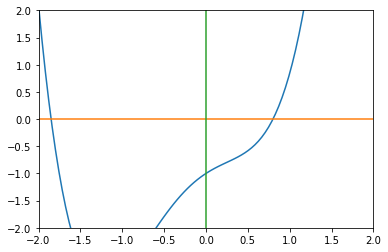

In [5]:
t = np.linspace(-2, 2, 100)
plt.plot(t, func(t))
plt.plot(t, np.zeros(len(t)))
plt.plot(np.zeros(len(t)),2*t)
plt.xlim(-2,2)
plt.ylim(-2,2)

## Gauss–Legendre algorithm
The algorithm is used to calculate the value of $\pi$ using the following formula:
<br>
1. Initial value setting:
$$ a_{0}=1\qquad b_{0}={\frac {1}{\sqrt {2}}}\qquad t_{0}={\frac {1}{4}}\qquad p_{0}=1 $$
2. Repeat the following instructions until the difference of $a_{n}$ and $b_{n}$ is within the desired accuracy:
$${\displaystyle {\begin{aligned}a_{n+1}&={\frac {a_{n}+b_{n}}{2}},\\\\b_{n+1}&={\sqrt {a_{n}b_{n}}},\\\\t_{n+1}&=t_{n}-p_{n}(a_{n}-a_{n+1})^{2},\\\\p_{n+1}&=2p_{n}.\\\end{aligned}}}$$
3. π is then approximated as:
$${\displaystyle \pi \approx {\frac {(a_{n+1}+b_{n+1})^{2}}{4t_{n+1}}}}$$

In [6]:
def pi_algo(iterations, precision):
    decimal.getcontext().prec = precision+4
    D = decimal.Decimal
    a0 = 1
    b0 = 1/D(2).sqrt()
    t0 = 1/D(4)
    p0 = 1
    pi = 3.14
    for _ in range(iterations):
        a_n = D(a0+b0)/2
        b_n = D(a0*b0).sqrt()
        t_n = t0 - D(p0)*D(a0-a_n)**2
        p_n = D(2*p0)

        #Resetting the values
        a0 = a_n
        b0 = b_n
        t0 = t_n
        p0 = p_n

        #getting pi
        pi = D(a_n+b_n)**2/D(4*t_n)
        # print(f"Pi after {iter} number of iterations is \n{pi}")
    return pi            

In [7]:
pi = pi_algo(2,100)
len(str(pi))

105

In [8]:
def n_digits_of_pi(n):
    with open('pi/1m.txt', "r") as f:
        line = f.readline().strip()[:n+2]
        return line

In [9]:
n_digits_of_pi(100)

'3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679'

In [10]:
str(pi_algo(7,100))[:102]

'3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679'

In [11]:
n_digits_of_pi(100) == str(pi_algo(7,100))[:102]

True

In [12]:
milestones =[10+2**x for x in range(3,20)]
iterations = []
iter = 0
for i in range(len(milestones)):
    while True:
        calc_pi = str(pi_algo(iterations=iter, precision=milestones[i]))[:milestones[i]+2]
        real_pi = n_digits_of_pi(milestones[i]) 
        if calc_pi==real_pi:
            iterations.append(iter)
            break
        else:
            print(f"Iteration: {iter}")
            iter+=1

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17


In [15]:
from life_saving_tools.Notification import Notification

In [16]:
n = Notification()
n.play_n_stop()

In [13]:
m = [10+2**x for x in range(3,20)]

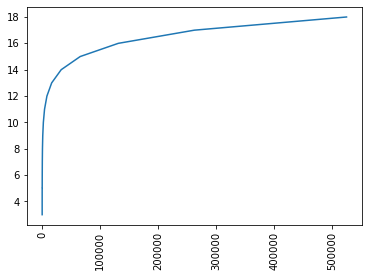

In [14]:
plt.plot(milestones, iterations)
plt.xticks(rotation = 90);

In [20]:
huge_str = '''
3.1415926535 8979323846 2643383279 5028841971 6939937510 5820974944 5923078164 0628620899 8628034825 3421170679 8214808651 3282306647 0938446095 5058223172 5359408128 4811174502 8410270193 8521105559 6446229489 5493038196 4428810975 6659334461 2847564823 3786783165 2712019091 4564856692 3460348610 4543266482 1339360726 0249141273 7245870066 0631558817 4881520920 9628292540 9171536436 7892590360 0113305305 4882046652 1384146951 9415116094 3305727036 5759591953 0921861173 8193261179 3105118548 0744623799 6274956735 1885752724 8912279381 8301194912 9833673362 4406566430 8602139494 6395224737 1907021798 6094370277 0539217176 2931767523 8467481846 7669405132 0005681271 4526356082 7785771342 7577896091 7363717872 1468440901 2249534301 4654958537 1050792279 6892589235 4201995611 2129021960 8640344181 5981362977 4771309960 5187072113 4999999837 2978049951 0597317328 1609631859 5024459455 3469083026 4252230825 3344685035 2619311881 7101000313 7838752886 5875332083 8142061717 7669147303 5982534904 2875546873 1159562863 8823537875 9375195778 1857780532 1712268066 1300192787 6611195909 2164201989
'''
huge_str = huge_str.replace(' ', '')
huge_str = huge_str.replace('\n', '')
len(huge_str)

1002

In [18]:
huge_str_2 = """
3.14159 26535 89793 23846 26433 83279 50288 41971 69399 37510 58209 74944 59230 78164 06286 20899 86280 34825 34211 70679 82148 08651 32823 06647 09384 46095 50582 23172 53594 08128 48111 74502 84102 70193 85211 05559 64462 29489 54930 38196 44288 10975 66593 34461 28475 64823 37867 83165 27120 19091 45648 56692 34603 48610 45432 66482 13393 60726 02491 41273 72458 70066 06315 58817 48815 20920 96282 92540 91715 36436 78925 90360 01133 05305 48820 46652 13841 46951 94151 16094 33057 27036 57595 91953 09218 61173 81932 61179 31051 18548 07446 23799 62749 56735 18857 52724 89122 79381 83011 94912 98336 73362 44065 66430 86021 39494 63952 24737 19070 21798 60943 70277 05392 17176 29317 67523 84674 81846 76694 05132 00056 81271 45263 56082 77857 71342 75778 96091 73637 17872 14684 40901 22495 34301 46549 58537 10507 92279 68925 89235 42019 95611 21290 21960 86403 44181 59813 62977 47713 09960 51870 72113 49999 99837 29780 49951 05973 17328 16096 31859 50244 59455 34690 83026 42522 30825 33446 85035 26193 11881 71010 00313 78387 52886 58753 32083 81420 61717 76691 47303 59825 34904 28755 46873 11595 62863 88235 37875 93751 95778 18577 80532 17122 68066 13001 92787 66111 95909 21642 01989 38095 25720 10654 85863 27886 59361 53381 82796 82303 01952 03530 18529 68995 77362 25994 13891 24972 17752 83479 13151 55748 57242 45415 06959 50829 53311 68617 27855 88907 50983 81754 63746 49393 19255 06040 09277 01671 13900 98488 24012 85836 16035 63707 66010 47101 81942 95559 61989 46767 83744 94482 55379 77472 68471 04047 53464 62080 46684 25906 94912 93313 67702 89891 52104 75216 20569 66024 05803 81501 93511 25338 24300 35587 64024 74964 73263 91419 92726 04269 92279 67823 54781 63600 93417 21641 21992 45863 15030 28618 29745 55706 74983 85054 94588 58692 69956 90927 21079 75093 02955 32116 53449 87202 75596 02364 80665 49911 98818 34797 75356 63698 07426 54252 78625 51818 41757 46728 90977 77279 38000 81647 06001 61452 49192 17321 72147 72350 14144 19735 68548 16136 11573 52552 13347 57418 49468 43852 33239 07394 14333 45477 62416 86251 89835 69485 56209 92192 22184 27255 02542 56887 67179 04946 01653 46680 49886 27232 79178 60857 84383 82796 79766 81454 10095 38837 86360 95068 00642 25125 20511 73929 84896 08412 84886 26945 60424 19652 85022 21066 11863 06744 27862 20391 94945 04712 37137 86960 95636 43719 17287 46776 46575 73962 41389 08658 32645 99581 33904 78027 59009 94657 64078 95126 94683 98352 59570 98258 22620 52248 94077 26719 47826 84826 01476 99090 26401 36394 43745 53050 68203 49625 24517 49399 65143 14298 09190 65925 09372 21696 46151 57098 58387 41059 78859 59772 97549 89301 61753 92846 81382 68683 86894 27741 55991 85592 52459 53959 43104 99725 24680 84598 72736 44695 84865 38367 36222 62609 91246 08051 24388 43904 51244 13654 97627 80797 71569 14359 97700 12961 60894 41694 86855 58484 06353 42207 22258 28488 64815 84560 28506 01684 27394 52267 46767 88952 52138 52254 99546 66727 82398 64565 96116 35488 62305 77456 49803 55936 34568 17432 41125 15076 06947 94510 96596 09402 52288 79710 89314 56691 36867 22874 89405 60101 50330 86179 28680 92087 47609 17824 93858 90097 14909 67598 52613 65549 78189 31297 84821 68299 89487 22658 80485 75640 14270 47755 51323 79641 45152 37462 34364 54285 84447 95265 86782 10511 41354 73573 95231 13427 16610 21359 69536 23144 29524 84937 18711 01457 65403 59027 99344 03742 00731 05785 39062 19838 74478 08478 48968 33214 45713 86875 19435 06430 21845 31910 48481 00537 06146 80674 91927 81911 97939 95206 14196 63428 75444 06437 45123 71819 21799 98391 01591 95618 14675 14269 12397 48940 90718 64942 31961 56794 52080 95146 55022 52316 03881 93014 20937 62137 85595 66389 37787 08303 90697 92077 34672 21825 62599 66150 14215 03068 03844 77345 49202 60541 46659 25201 49744 28507 32518 66600 21324 34088 19071 04863 31734 64965 14539 05796 26856 10055 08106 65879 69981 63574 73638 40525 71459 10289 70641 40110 97120 62804 39039 75951 56771 57700 42033 78699 36007 23055 87631 76359 42187 31251 47120 53292 81918 26186 12586 73215 79198 41484 88291 64470 60957 52706 95722 09175 67116 72291 09816 90915 28017 35067 12748 58322 28718 35209 35396 57251 21083 57915 13698 82091 44421 00675 10334 67110 31412 67111 36990 86585 16398 31501 97016 51511 68517 14376 57618 35155 65088 49099 89859 98238 73455 28331 63550 76479 18535 89322 61854 89632 13293 30898 57064 20467 52590 70915 48141 65498 59461 63718 02709 81994 30992 44889 57571 28289 05923 23326 09729 97120 84433 57326 54893 82391 19325 97463 66730 58360 41428 13883 03203 82490 37589 85243 74417 02913 27656 18093 77344 40307 07469 21120 19130 20330 38019 76211 01100 44929 32151 60842 44485 96376 69838 95228 68478 31235 52658 21314 49576 85726 24334 41893 03968 64262 43410 77322 69780 28073 18915 44110 10446 82325 27162 01052 65227 21116 60396 66557 30925 47110 55785 37634 66820 65310 98965 26918 62056 47693 12570 58635 66201 85581 00729 36065 98764 86117 91045 33488 50346 11365 76867 53249 44166 80396 26579 78771 85560 84552 96541 26654 08530 61434 44318 58676 97514 56614 06800 70023 78776 59134 40171 27494 70420 56223 05389 94561 31407 11270 00407 85473 32699 39081 45466 46458 80797 27082 66830 63432 85878 56983 05235 80893 30657 57406 79545 71637 75254 20211 49557 61581 40025 01262 28594 13021 64715 50979 25923 09907 96547 37612 55176 56751 35751 78296 66454 77917 45011 29961 48903 04639 94713 29621 07340 43751 89573 59614 58901 93897 13111 79042 97828 56475 03203 19869 15140 28708 08599 04801 09412 14722 13179 47647 77262 24142 54854 54033 21571 85306 14228 81375 85043 06332 17518 29798 66223 71721 59160 77166 92547 48738 98665 49494 50114 65406 28433 66393 79003 97692 65672 14638 53067 36096 57120 91807 63832 71664 16274 88880 07869 25602 90228 47210 40317 21186 08204 19000 42296 61711 96377 92133 75751 14959 50156 60496 31862 94726 54736 42523 08177 03675 15906 73502 35072 83540 56704 03867 43513 62222 47715 89150 49530 98444 89333 09634 08780 76932 59939 78054 19341 44737 74418 42631 29860 80998 88687 41326 04721 56951 62396 58645 73021 63159 81931 95167 35381 29741 67729 47867 24229 24654 36680 09806 76928 23828 06899 64004 82435 40370 14163 14965 89794 09243 23789 69070 69779 42236 25082 21688 95738 37986 23001 59377 64716 51228 93578 60158 81617 55782 97352 33446 04281 51262 72037 34314 65319 77774 16031 99066 55418 76397 92933 44195 21541 34189 94854 44734 56738 31624 99341 91318 14809 27777 10386 38773 43177 20754 56545 32207 77092 12019 05166 09628 04909 26360 19759 88281 61332 31666 36528 61932 66863 36062 73567 63035 44776 28035 04507 77235 54710 58595 48702 79081 43562 40145 17180 62464 36267 94561 27531 81340 78330 33625 42327 83944 97538 24372 05835 31147 71199 26063 81334 67768 79695 97030 98339 13077 10987 04085 91337 46414 42822 77263 46594 70474 58784 77872 01927 71528 07317 67907 70715 72134 44730 60570 07334 92436 93113 83504 93163 12840 42512 19256 51798 06941 13528 01314 70130 47816 43788 51852 90928 54520 11658 39341 96562 13491 43415 95625 86586 55705 52690 49652 09858 03385 07224 26482 93972 85847 83163 05777 75606 88876 44624 82468 57926 03953 52773 48030 48029 00587 60758 25104 74709 16439 61362 67604 49256 27420 42083 20856 61190 62545 43372 13153 59584 50687 72460 29016 18766 79524 06163 42522 57719 54291 62991 93064 55377 99140 37340 43287 52628 88963 99587 94757 29174 64263 57455 25407 90914 51357 11136 94109 11939 32519 10760 20825 20261 87985 31887 70584 29725 91677 81314 96990 09019 21169 71737 27847 68472 68608 49003 37702 42429 16513 00500 51683 23364 35038 95170 29893 92233 45172 20138 12806 96501 17844 08745 19601 21228 59937 16231 30171 14448 46409 03890 64495 44400 61986 90754 85160 26327 50529 83491 87407 86680 88183 38510 22833 45085 04860 82503 93021 33219 71551 84306 35455 00766 82829 49304 13776 55279 39751 75461 39539 84683 39363 83047 46119 96653 85815 38420 56853 38621 86725 23340 28308 71123 28278 92125 07712 62946 32295 63989 89893 58211 67456 27010 21835 64622 01349 67151 88190 97303 81198 00497 34072 39610 36854 06643 19395 09790 19069 96395 52453 00545 05806 85501 95673 02292 19139 33918 56803 44903 98205 95510 02263 53536 19204 19947 45538 59381 02343 95544 95977 83779 02374 21617 27111 72364 34354 39478 22181 85286 24085 14006 66044 33258 88569 86705 43154 70696 57474 58550 33232 33421 07301 54594 05165 53790 68662 73337 99585 11562 57843 22988 27372 31989 87571 41595 78111 96358 33005 94087 30681 21602 87649 62867 44604 77464 91599 50549 73742 56269 01049 03778 19868 35938 14657 41268 04925 64879 85561 45372 34786 73303 90468 83834 36346 55379 49864 19270 56387 29317 48723 32083 76011 23029 91136 79386 27089 43879 93620 16295 15413 37142 48928 30722 01269 01475 46684 76535 76164 77379 46752 00490 75715 55278 19653 62132 39264 06160 13635 81559 07422 02020 31872 77605 27721 90055 61484 25551 87925 30343 51398 44253 22341 57623 36106 42506 39049 75008 65627 10953 59194 65897 51413 10348 22769 30624 74353 63256 91607 81547 81811 52843 66795 70611 08615 33150 44521 27473 92454 49454 23682 88606 13408 41486 37767 00961 20715 12491 40430 27253 86076 48236 34143 34623 51897 57664 52164 13767 96903 14950 19108 57598 44239 19862 91642 19399 49072 36234 64684 41173 94032 65918 40443 78051 33389 45257 42399 50829 65912 28508 55582 15725 03107 12570 12668 30240 29295 25220 11872 67675 62204 15420 51618 41634 84756 51699 98116 14101 00299 60783 86909 29160 30288 40026 91041 40792 88621 50784 24516 70908 70006 99282 12066 04183 71806 53556 72525 32567 53286 12910 42487 76182 58297 65157 95984 70356 22262 93486 00341 58722 98053 49896 50226 29174 87882 02734 20922 22453 39856 26476 69149 05562 84250 39127 57710 28402 79980 66365 82548 89264 88025 45661 01729 67026 64076 55904 29099 45681 50652 65305 37182 94127 03369 31378 51786 09040 70866 71149 65583 43434 76933 85781 71138 64558 73678 12301 45876 87126 60348 91390 95620 09939 36103 10291 61615 28813 84379 09904 23174 73363 94804 57593 14931 40529 76347 57481 19356 70911 01377 51721 00803 15590 24853 09066 92037 67192 20332 29094 33467 68514 22144 77379 39375 17034 43661 99104 03375 11173 54719 18550 46449 02636 55128 16228 82446 25759 16333 03910 72253 83742 18214 08835 08657 39177 15096 82887 47826 56995 99574 49066 17583 44137 52239 70968 34080 05355 98491 75417 38188 39994 46974 86762 65516 58276 58483 58845 31427 75687 90029 09517 02835 29716 34456 21296 40435 23117 60066 51012 41200 65975 58512 76178 58382 92041 97484 42360 80071 93045 76189 32349 22927 96501 98751 87212 72675 07981 25547 09589 04556 35792 12210 33346 69749 92356 30254 94780 24901 14195 21238 28153 09114 07907 38602 51522 74299 58180 72471 62591 66854 51333 12394 80494 70791 19153 26734 30282 44186 04142 63639 54800 04480 02670 49624 82017 92896 47669 75831 83271 31425 17029 69234 88962 76684 40323 26092 75249 60357 99646 92565 04936 81836 09003 23809 29345 95889 70695 36534 94060 34021 66544 37558 90045 63288 22505 45255 64056 44824 65151 87547 11962 18443 96582 53375 43885 69094 11303 15095 26179 37800 29741 20766 51479 39425 90298 96959 46995 56576 12186 56196 73378 62362 56125 21632 08628 69222 10327 48892 18654 36480 22967 80705 76561 51446 32046 92790 68212 07388 37781 42335 62823 60896 32080 68222 46801 22482 61177 18589 63814 09183 90367 36722 20888 32151 37556 00372 79839 40041 52970 02878 30766 70944 47456 01345 56417 25437 09069 79396 12257 14298 94671 54357 84687 88614 44581 23145 93571 98492 25284 71605 04922 12424 70141 21478 05734 55105 00801 90869 96033 02763 47870 81081 75450 11930 71412 23390 86639 38339 52942 57869 05076 43100 63835 19834 38934 15961 31854 34754 64955 69781 03829 30971 64651 43840 70070 73604 11237 35998 43452 25161 05070 27056 23526 60127 64848 30840 76118 30130 52793 20542 74628 65403 60367 45328 65105 70658 74882 25698 15793 67897 66974 22057 50596 83440 86973 50201 41020 67235 85020 07245 22563 26513 41055 92401 90274 21624 84391 40359 98953 53945 90944 07046 91209 14093 87001 26456 00162 37428 80210 92764 57931 06579 22955 24988 72758 46101 26483 69998 92256 95968 81592 05600 10165 52563 7567
"""
huge_str_2 = huge_str_2.replace(' ', '')
huge_str_2 = huge_str_2.replace('\n', '')

In [19]:
len(huge_str_2)

10001

In [22]:
with open("pi/1m.txt", 'r') as f:
    numbers = f.read()

In [23]:
len(numbers)

1000002

In [24]:

def get_iter_precision(precision):
    original_pi = huge_str_2
    iter = 0
    while True:
        calc_pi = str(pi_algo(iter, precision))[2:precision+2]
        if calc_pi == original_pi[2:precision+2]:
            print(f'{precision} digits of pi in just {iter} iterations!')
            return iter
        else:
            print(f"Currently on iteration {iter}.")
            iter += 1

In [25]:
get_iter_precision(9990)

Currently on iteration 0.
Currently on iteration 1.
Currently on iteration 2.
Currently on iteration 3.
Currently on iteration 4.
Currently on iteration 5.
Currently on iteration 6.
Currently on iteration 7.
Currently on iteration 8.
Currently on iteration 9.
Currently on iteration 10.
Currently on iteration 11.
9990 digits of pi in just 12 iterations!


12

In [28]:
import timeit
time = timeit.timeit("pi_algo(10, 1000)", setup="from __main__ import pi_algo", number=1000)
print(f"Time taken for 1000 iterations is {time}")

Time taken for 1000 iterations is 6.851914800000031
